#Домашнее задание 2

##Данные

In [120]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [121]:
from sklearn.datasets import load_boston
df = load_boston()

In [122]:
feature_names = df['feature_names']
X = df['data']
y = df['target']

In [123]:
from sklearn.preprocessing import scale
X = scale(X)

##Задание 1

Функция для графика:

In [124]:
def plot_correlation(correlations):
    plt.rcParams["figure.figsize"] = (14, 10)
    ind = range(len(feature_names))
    plt.bar(ind, correlations, color='red')
    plt.xticks(ind, feature_names)
    plt.ylabel('absolute value of correlation')
    plt.xlabel('features')
    plt.title('Pearson correlation coefficients', size=18)
    plt.grid()
    plt.show()

Реализация Filter метода:

In [125]:
def filter_method(X_data, y_data, n=5):
    n_features = X_data.shape[1]
    n_objects = X_data.shape[0]
    y_mean = np.mean(y_data)
    v_mean = np.mean(X_data, axis=0)
    Pearson_correlation = []
    for ind in range(n_features):
        v = X_data[:, ind] 
        correlation = np.dot(v - v_mean[ind], y_data - y_mean) / np.linalg.norm(v - v_mean[ind]) / np.linalg.norm(y_data - y_mean)
        Pearson_correlation.append(correlation)
    Pearson_correlation = np.abs(Pearson_correlation)
    plot_correlation(Pearson_correlation)

    return np.argpartition(Pearson_correlation, -n)[-n:]

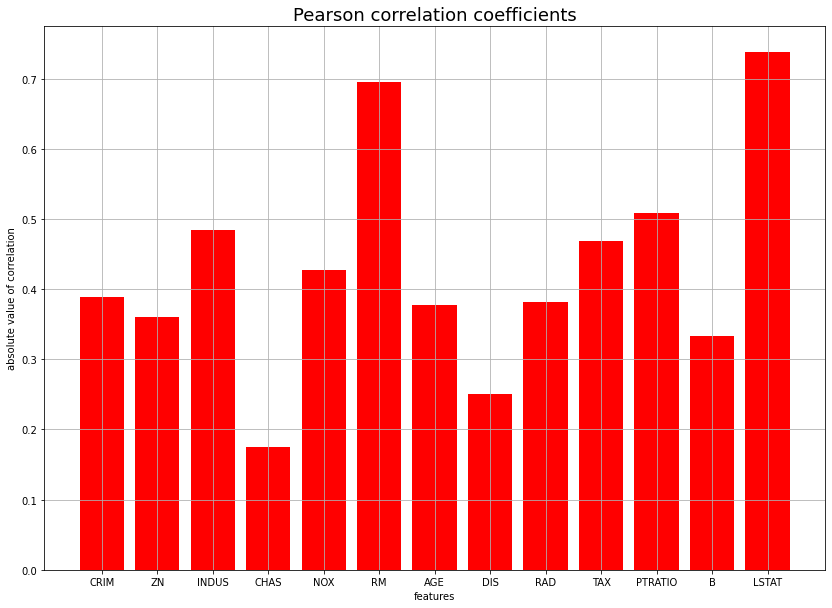

In [126]:
features_filter = filter_method(X, y, n=5)

5 лучших признаков по версии Filter:

In [127]:
feature_names[features_filter]

array(['TAX', 'INDUS', 'PTRATIO', 'RM', 'LSTAT'], dtype='<U7')

##Задание 2

Реализация Greedy Forward Selection:

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math 



def greedy_forward_method(X_data, y_data, n=5):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=6)
    
    features = []
    unused_features = list(range(X_data.shape[1]))
    for i in range(n):
        min_error = math.inf
        best_feature = None
        # print(f'features: {features}')
        for j in unused_features:
            model = LinearRegression()
            train_data = X_train[:, features + [j]]
            model.fit(train_data, y_train)

            test_data = X_test[:, features + [j]]
            y_pred = model.predict(test_data)
            error = mean_squared_error(y_test, y_pred)
            # print(f' j: {j}, error: {error}')
            if error < min_error:
                min_error = error
                best_feature = j
        
        if best_feature:
            unused_features.remove(best_feature)
            features.append(best_feature)
        else:
            break
                
    return features

5 лучших признаков по версии Greedy Forward Selection:

In [129]:
features_forward = greedy_forward_method(X, y)

feature_names[features_forward]

array(['LSTAT', 'RM', 'PTRATIO', 'B', 'CHAS'], dtype='<U7')

Реалиация Greedy Backward Elimination:

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math 



def greedy_backward_method(X_data, y_data, n=5):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=6)
    
    features = list(range(X_data.shape[1]))
    for i in range(len(features) - n):
        min_error = math.inf
        worst_feature = None
        # print(f'features: {features}')
        for j in features:
            model = LinearRegression()
            features_copy = features.copy()
            features_copy.remove(j)
            train_data = X_train[:, features_copy]
            model.fit(train_data, y_train)

            test_data = X_test[:, features_copy]
            y_pred = model.predict(test_data)
            error = mean_squared_error(y_test, y_pred)
            # print(f' j: {j}, error: {error}')
            if error < min_error:
                min_error = error
                worst_feature = j
        
        if worst_feature:
            features.remove(worst_feature)
        else:
            break
                
    return features

5 лучших признаков по версии Greedy Backward Elimination:

In [131]:
features_backward = greedy_backward_method(X, y)

feature_names[features_backward]

array(['CRIM', 'NOX', 'RM', 'DIS', 'PTRATIO'], dtype='<U7')

##Задание 3

Лассо штрафует весовые коэффициенты модели для изменения их важности для модели и может даже обнулить их (т.е. убрать эти переменные из конечной модели). Обычно Лассо используется, если набор данных содержит большое число переменных и требуется исключить некоторые из них, чтобы лучше понять, как важные признаки влияют на модель (т.е. те признаки, которые были выбраны Лассо и у которых установлена важность).

Настраивать вклад регулязирующего оператора помогает параметр лямбда. Чем больше лямбда, тем больше весов обнуляется, то есть тем больше признаков "выбрасывается". Для того, чтобы найти нужное значение параметра лямбда, будем перебирать значение лямбда по сетке от 0.1 до 7.0 .

In [132]:
from sklearn.linear_model import Lasso

def lasso_method(X_data, y_data, lam):
    model = Lasso(lam)
    model.fit(X, y)
    return np.where(model.coef_ != 0.)[0]

Переберём значения ламбда от 0.1 до 7.0 .

In [133]:
lam_vars = np.linspace(0.1, 7, num=20)
features_nonzero = []
for lam in lam_vars:
    model = Lasso(lam)
    model.fit(X, y)
    features_nonzero.append(len(lasso_method(X, y, lam)))

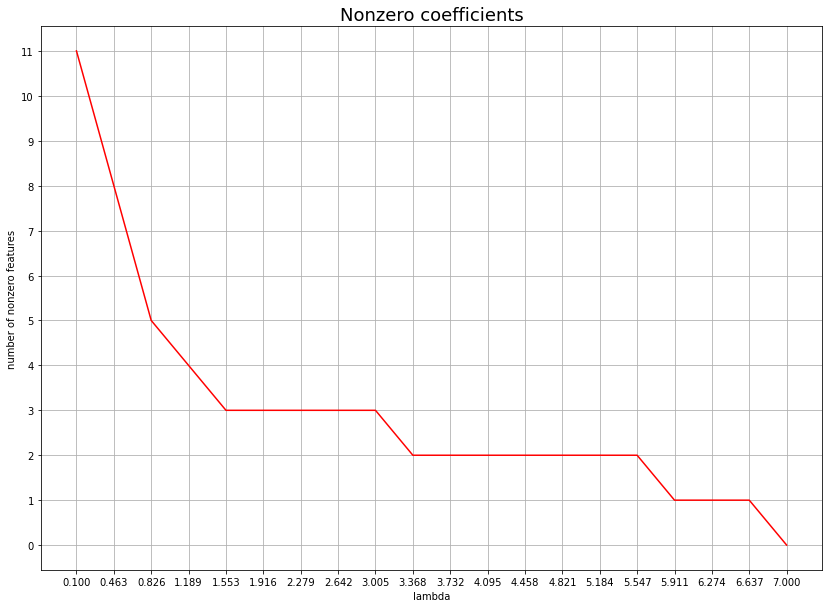

In [144]:
plt.plot(lam_vars, features_nonzero, color='red')
plt.xticks(lam_vars)
plt.yticks(range(12))
plt.ylabel('number of nonzero features')
plt.xlabel('lambda')
plt.title('Nonzero coefficients', size=18)
plt.grid()
plt.show()

5 лучших признаков по версии Lasso:

In [135]:
lam = 0.826
features_lasso = lasso_method(X, y, lam)
feature_names[features_lasso]

array(['CHAS', 'RM', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

##Финальные результаты

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [141]:
def train_features(features):
    X_train_features = X_train[:, features]
    X_test_features = X_test[:, features]

    model = LinearRegression()
    model.fit(X_train_features, y_train)

    y_pred = model.predict(X_test_features)
    
    print(f'features: {feature_names[features]}, mse: {mean_squared_error(y_test, y_pred)}')
    print('---------------------------------------------------------------------------')

In [146]:
print('Filter: ')
train_features(features_filter)
print('Greedy Forward Selection: ')
train_features(features_forward)
print('Greedy Backward Elimination: ')
train_features(features_backward)
print('Lasso: ')
train_features(features_lasso)

Filter: 
features: ['TAX' 'INDUS' 'PTRATIO' 'RM' 'LSTAT'], mse: 27.57474327511821
---------------------------------------------------------------------------
Greedy Forward Selection: 
features: ['LSTAT' 'RM' 'PTRATIO' 'B' 'CHAS'], mse: 25.90044262256323
---------------------------------------------------------------------------
Greedy Backward Elimination: 
features: ['CRIM' 'NOX' 'RM' 'DIS' 'PTRATIO'], mse: 22.13415534924071
---------------------------------------------------------------------------
Lasso: 
features: ['CHAS' 'RM' 'PTRATIO' 'B' 'LSTAT'], mse: 25.900442622563205
---------------------------------------------------------------------------


Лучший результат дала модель, обученная на признаках, выбранных с помощью Greedy Backward Elimination.